<a href="https://colab.research.google.com/github/Nikkiie/Online-Retail-Customer-Segmentation-Unsupervised/blob/main/Online_Retail_Customer_Segmentation_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE - Online Retail Customer Segmentation**

# **GITHUB LINK:-**

# **PROBLEM DESCRIPTION**

**Your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

**Attribute Information:-**

1> InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2> StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

3> Description: Product (item) name. Nominal.

4> Quantity: The quantities of each product (item) per transaction. Numeric.

5> InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

6> UnitPrice: Unit price. Numeric, Product price per unit in sterling.

7> CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

8> Country: Country name. Nominal, the name of the country where each customer resides.





# **IMPORTING LIBRARIES**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# **Loading the dataset**

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Giving the file path

df = pd.read_excel("/content/drive/MyDrive/cap 4/Online Retail.xlsx")

**Dataset First view**

In [4]:
# First 5 Rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Last 5 Rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Dataset Rows & Columns count**

In [6]:
# Data shape
df.shape

(541909, 8)

In [7]:
#Check all the coloumns present in our dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Dataset Information**

In [8]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Checking Unique Value**

In [9]:
# Looking for unique values in columns of dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in InvoiceNo - 25900
Total Unique Values in StockCode - 4070
Total Unique Values in Description - 4224
Total Unique Values in Quantity - 722
Total Unique Values in InvoiceDate - 23260
Total Unique Values in UnitPrice - 1630
Total Unique Values in CustomerID - 4373
Total Unique Values in Country - 38


In [13]:
# Statistical info.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Duplicate Values**

In [10]:
# Checking duplicates
print(len(df[df.duplicated()]))

5268


# **Data Cleaning**

**Looking for Null Values**

In [11]:
# Checking null value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

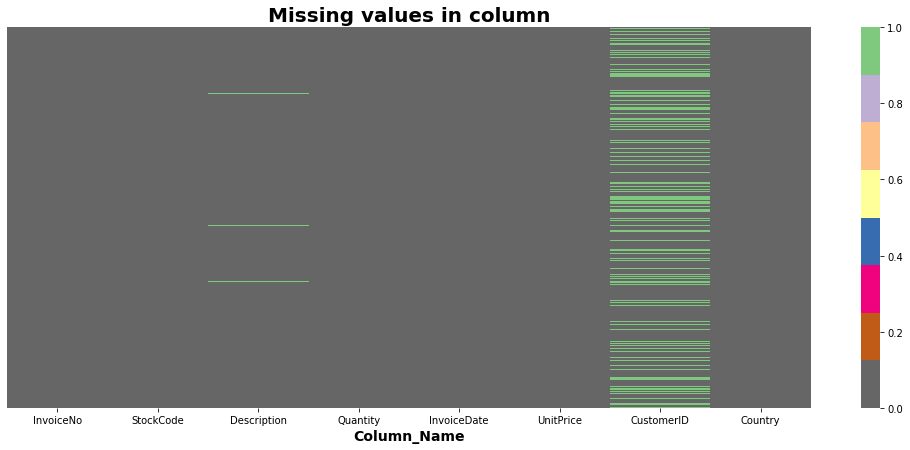

In [23]:
#Plot for visualizing null values
plt.figure(figsize=(18, 7))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap="Accent_r")
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=20)
plt.show()

* After looking into the plot, we can clearly see that the ColumnID of our dataset has the highest number of NAN values which could impact our result. But with the missing value in Description column are quite less, which could not impact on our result.


In [24]:
#Dropping the missing value from our dataset

df.dropna(inplace=True)

In [25]:
# Checking df information after null value removal

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [27]:
#Dropping the duplicate values from our dataset

df.drop_duplicates(inplace=True)

In [28]:
# Checking df shape after null value and dupplicates removal

df.shape

(401604, 8)

* Hence, after removing the null values from columns 'Description' and 'CustomerID', and dropping of duplicate values our dataset value has been reduced to 401604 from 541909.

# **Exploratory data analysis**